## Udacity Data Wrangling Project: WeRateDogs Twitter Data

### Load Libraries

In [1]:
# load libraries
import pandas as pd
import numpy as np
import requests
import tweepy
import json
import time
import os
import datetime
import string
import matplotlib.pyplot as plt
import math
import seaborn as sns

In [2]:
archive = pd.read_csv('twitter-archive-enhanced(1).csv', encoding="utf-8")
archive.head(2)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None


### Download Image Prediction Data

In [3]:
url='https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)

open('image_prediction.tsv', 'wb').write(response.content)

335079

In [4]:
# load image_prediction.tsv
predictions = pd.read_csv('image_prediction.tsv', sep='\t')
predictions.head(2)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True


In [5]:
consumer_key = 'HIDDEN'
consumer_secret = 'HIDDEN'
access_token = 'HIDDEN'
access_token_secret = 'HIDDEN'

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)

api = tweepy.API(auth, wait_on_rate_limit=True, wait_on_rate_limit_notify=True)

In [6]:
# get tweet status
tweet = api.get_status(archive.tweet_id[7], tweet_mode='extended')

In [7]:
# show tweet info
info = tweet._json
info

{'created_at': 'Fri Jul 28 00:22:40 +0000 2017',
 'id': 890729181411237888,
 'id_str': '890729181411237888',
 'full_text': "When you watch your owner call another dog a good boy but then they turn back to you and say you're a great boy. 13/10 https://t.co/v0nONBcwxq",
 'truncated': False,
 'display_text_range': [0, 118],
 'entities': {'hashtags': [],
  'symbols': [],
  'user_mentions': [],
  'urls': [],
  'media': [{'id': 890729118844600320,
    'id_str': '890729118844600320',
    'indices': [119, 142],
    'media_url': 'http://pbs.twimg.com/media/DFyBag_UQAAhhBC.jpg',
    'media_url_https': 'https://pbs.twimg.com/media/DFyBag_UQAAhhBC.jpg',
    'url': 'https://t.co/v0nONBcwxq',
    'display_url': 'pic.twitter.com/v0nONBcwxq',
    'expanded_url': 'https://twitter.com/dog_rates/status/890729181411237888/photo/1',
    'type': 'photo',
    'sizes': {'thumb': {'w': 150, 'h': 150, 'resize': 'crop'},
     'large': {'w': 1200, 'h': 1328, 'resize': 'fit'},
     'medium': {'w': 1084, 'h': 1200,

In [8]:
# create tweet_json.txt file if it is no already existing
file = 'tweet_json.txt'
if not os.path.isfile(file):
    open(file, 'w', encoding = 'UTF-8')

In [9]:
# create a tweet id list
tweet_ids = archive.tweet_id.values

In [10]:
errors_tweets = []

# get start time of query
print("Start time:", datetime.datetime.now().time())
start = time.time()

# write JSON to .txt file
with open('tweet_json.txt', 'w', encoding = 'UTF-8') as file:
    for tweet_id in tweet_ids:
        try:
            tweet = api.get_status(tweet_id, tweet_mode = 'extended')
            json.dump(tweet._json, file)
            file.write('\n')
        except Exception as e:
            print("Error in Tweet ID:", tweet_id, "Time:",  datetime.datetime.now().time())
            errors_tweets.append(tweet_id)

# get end time of query
end = time.time()
print("End time:", datetime.datetime.now().time())

# display runtime
print("Runtime: ", end - start)

Start time: 18:46:59.260539
Error in Tweet ID: 888202515573088257 Time: 18:47:03.435311
Error in Tweet ID: 873697596434513921 Time: 18:47:17.656098
Error in Tweet ID: 872668790621863937 Time: 18:47:18.825492
Error in Tweet ID: 872261713294495745 Time: 18:47:19.356870
Error in Tweet ID: 869988702071779329 Time: 18:47:22.025580
Error in Tweet ID: 866816280283807744 Time: 18:47:24.595868
Error in Tweet ID: 861769973181624320 Time: 18:47:28.786795
Error in Tweet ID: 845459076796616705 Time: 18:47:46.246319
Error in Tweet ID: 842892208864923648 Time: 18:47:48.675821
Error in Tweet ID: 837012587749474308 Time: 18:47:56.339817
Error in Tweet ID: 827228250799742977 Time: 18:48:12.981941
Error in Tweet ID: 812747805718642688 Time: 18:48:36.284923
Error in Tweet ID: 802247111496568832 Time: 18:48:47.599831
Error in Tweet ID: 775096608509886464 Time: 18:49:29.380215
Error in Tweet ID: 770743923962707968 Time: 18:49:35.849955
Rate limit reached. Sleeping for: 728
Error in Tweet ID: 754011816964026

In [11]:
# display error IDs
errors_tweets

[888202515573088257,
 873697596434513921,
 872668790621863937,
 872261713294495745,
 869988702071779329,
 866816280283807744,
 861769973181624320,
 845459076796616705,
 842892208864923648,
 837012587749474308,
 827228250799742977,
 812747805718642688,
 802247111496568832,
 775096608509886464,
 770743923962707968,
 754011816964026368,
 680055455951884288]

In [12]:
# extract data from tweet_json.txt file
df_tweets = []
dict_tweets = {}
with open('tweet_json.txt') as json_file:
    # data = json.loads(json_file)
    for line in json_file:
        data = json.loads(line)
        df_tweets.append({'tweet_id': data['id'],
                        'retweet_count': data['retweet_count'],
                        'favorite_count': data['favorite_count']})     

In [13]:
# create dataframe
df_api = pd.DataFrame(df_tweets, columns= ['tweet_id',
                                           'retweet_count',
                                           'favorite_count'])

In [14]:
# head new api dataframe
df_api.head()

,tweet_id,retweet_count,favorite_count
0,892420643555336193,8226,37755
1,892177421306343426,6079,32437
2,891815181378084864,4023,24427
3,891689557279858688,8379,41090
4,891327558926688256,9083,39290


In [15]:
# save dataframe
df_api.to_csv('df_tweets.csv')

## Data Assessment


In [16]:
archive.head(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [17]:
# display complete row
pd.set_option('display.max_colwidth', -1)

In [18]:
archive

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421306343426/photo/1,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f",NaN,NaN,NaN,"https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here we have a majestic great white breaching off South Africa's coast. Absolutely h*ckin breathtaking. 13/10 (IG: tucker_marlo) #BarkWeek https://t.co/kQ04fDDRmh,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950875897856/photo/1,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Meet Jax. He enjoys ice cream so much he gets nervous around it. 13/10 help Jax enjoy more things by clicking below\n\nhttps://t.co/Zr4hWfAs1H https://t.co/tVJBRMnhxl,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,https://twitter.com/dog_rates/status/890971913173991426/photo/1",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",When you watch your owner call another dog a good boy but then they turn back to you and say you're a great boy. 13/10 https://t.co/v0nONBcwxq,NaN,NaN,NaN,"https://twitter.com/dog_rates/status/890729181411237888/photo/1,https://twitter.com/dog_rates/status/890729181411237888/photo/1",13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Zoey. She doesn't want to be one of the scary sharks. Just wants to be a snuggly pettable boatpet. 13/10 #BarkWeek https://t.co/9TwLuAGH0b,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185150312448/photo/1,13,10,Zoey,None,None,None,None
9,89024025534

In [19]:
archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [20]:
archive.tweet_id.nunique()

2356

In [21]:
archive.isnull().sum()

tweet_id                      0   
in_reply_to_status_id         2278
in_reply_to_user_id           2278
timestamp                     0   
source                        0   
text                          0   
retweeted_status_id           2175
retweeted_status_user_id      2175
retweeted_status_timestamp    2175
expanded_urls                 59  
rating_numerator              0   
rating_denominator            0   
name                          0   
doggo                         0   
floofer                       0   
pupper                        0   
puppo                         0   
dtype: int64

In [22]:
# count numbers of values in columns doggo, floofer, pupper and puppo
(archive.loc[:, 'doggo':'puppo'] != 'None').sum()

doggo      97 
floofer    10 
pupper     257
puppo      30 
dtype: int64

In [23]:
# check whether all dog names are filled
archive.name.value_counts()

None         745
a            55 
Charlie      12 
Lucy         11 
Cooper       11 
Oliver       11 
Lola         10 
Tucker       10 
Penny        10 
Winston      9  
Bo           9  
Sadie        8  
the          8  
Toby         7  
Buddy        7  
Daisy        7  
Bailey       7  
an           7  
Scout        6  
Dave         6  
Jack         6  
Jax          6  
Bella        6  
Milo         6  
Rusty        6  
Leo          6  
Oscar        6  
Stanley      6  
Koda         6  
Louis        5  
            ..  
Obi          1  
Marvin       1  
Mary         1  
Gerbald      1  
Tobi         1  
Rufio        1  
Sprinkles    1  
Aiden        1  
Wiggles      1  
Ginger       1  
Vince        1  
Jonah        1  
Dobby        1  
Kaia         1  
Arlo         1  
Gustav       1  
Al           1  
Ruffles      1  
Emma         1  
Glenn        1  
Noosh        1  
Lolo         1  
Steve        1  
Mitch        1  
Daniel       1  
Furzey       1  
by           1  
Darla        1

In [24]:
# check whether rating_numerator is always filled
archive.rating_numerator.value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7       55 
14      54 
5       37 
6       32 
3       19 
4       17 
1       9  
2       9  
420     2  
0       2  
15      2  
75      2  
80      1  
20      1  
24      1  
26      1  
44      1  
50      1  
60      1  
165     1  
84      1  
88      1  
144     1  
182     1  
143     1  
666     1  
960     1  
1776    1  
17      1  
27      1  
45      1  
99      1  
121     1  
204     1  
Name: rating_numerator, dtype: int64

In [25]:
archive.rating_numerator.describe()

count    2356.000000
mean     13.126486  
std      45.876648  
min      0.000000   
25%      10.000000  
50%      11.000000  
75%      12.000000  
max      1776.000000
Name: rating_numerator, dtype: float64

In [26]:
# check whether rating_demoninator is always filled
archive.rating_denominator.value_counts()

10     2333
11     3   
50     3   
80     2   
20     2   
2      1   
16     1   
40     1   
70     1   
15     1   
90     1   
110    1   
120    1   
130    1   
150    1   
170    1   
7      1   
0      1   
Name: rating_denominator, dtype: int64

In [27]:
archive.rating_denominator.describe()

count    2356.000000
mean     10.455433  
std      6.745237   
min      0.000000   
25%      10.000000  
50%      10.000000  
75%      10.000000  
max      170.000000 
Name: rating_denominator, dtype: float64

In [28]:
# check sources
archive.source.value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2221
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                        91  
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                     33  
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>    11  
Name: source, dtype: int64

#### predictions table

In [29]:
predictions.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [30]:
predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [31]:
# count null values
predictions.isnull().sum()

tweet_id    0
jpg_url     0
img_num     0
p1          0
p1_conf     0
p1_dog      0
p2          0
p2_conf     0
p2_dog      0
p3          0
p3_conf     0
p3_dog      0
dtype: int64

#### api_data table

In [32]:
df_api.head()

,tweet_id,retweet_count,favorite_count
0,892420643555336193,8226,37755
1,892177421306343426,6079,32437
2,891815181378084864,4023,24427
3,891689557279858688,8379,41090
4,891327558926688256,9083,39290


In [33]:
df_api.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2339 entries, 0 to 2338
Data columns (total 3 columns):
tweet_id          2339 non-null int64
retweet_count     2339 non-null int64
favorite_count    2339 non-null int64
dtypes: int64(3)
memory usage: 54.9 KB


In [34]:
df_api.describe()

,tweet_id,retweet_count,favorite_count
count,2.339000e+03,2339.000000,2339.000000
mean,7.421620e+17,2900.398461,7894.539974
std,6.828729e+16,4890.881398,12236.147037
min,6.660209e+17,0.000000,0.000000
25%,6.783378e+17,583.000000,1368.500000
50%,7.186133e+17,1353.000000,3435.000000
75%,7.986907e+17,3380.000000,9671.000000
max,8.924206e+17,82902.000000,163024.000000


In [35]:
# count null values
df_api.isnull().sum()

tweet_id          0
retweet_count     0
favorite_count    0
dtype: int64

## Data Cleaning

In [36]:
# copy dataframes for cleaning purposes
archive_clean = archive.copy()
predictions_clean = predictions.copy()
df_api_clean = df_api.copy()

###### Code

In [37]:
#find length of short url
url_length = len(archive_clean['text'][0].split()[-1])+1
url_length

# add column with new short URL
archive_clean['url_short'] = archive_clean['text'].apply(lambda row: row[-url_length:])

#remove the short URL from text
archive_clean['text'] = archive_clean['text'].apply(lambda row: row[:-url_length])

###### Test

In [38]:
archive_clean.head(1)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,url_short
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,Phineas,None,None,None,None,https://t.co/MgUWQ76dJU


###### Define

2. Missing names in archive table name column

###### Code

In [39]:
def find_names(df):
    list_names = []
    for line in df['text']:
        # find first '.'
        first_string = line.find('.')
        # if no dot is found, there might be no dog name
        if first_string == -1:
            list_names.append(np.NaN)
        else:
            # find name before dot
            string_before = line[:first_string].rsplit(' ', 1)[-1]
            # check if string before is capitalized
            if string_before == string_before.title():
                wrong_string = ['This', 'Rhododendron', 'Setter', 'Epispocalian', 'Parthenon', 'Islands', 'We', 
                               'Unbelievable', 'Improvement', 'Airport', 'Tortoise', 'Christmas', '"Yep', '"So', '37',
                               'Pulitzer', 'Oh', 'St', 'Up', 'Xbox']
                if (len(string_before) > 15) or any(word in string_before for word in wrong_string) or any(c for c in string_before if c not in string.ascii_letters + "'") or (len(string_before) < 2):
                    list_names.append(np.NaN)
                else:
                    list_names.append(string_before)
            else:
                list_names.append(np.NaN)
    return list_names

In [40]:
list_names = find_names(archive_clean)
archive_clean.name = list_names

###### Test

In [41]:
archive_clean.name.value_counts()

Charlie     14
Oliver      12
Cooper      11
Tucker      10
Lucy        10
Lola        10
Penny       9 
Winston     9 
Daisy       8 
Buddy       7 
Bo          7 
Bailey      7 
Bella       6 
Sadie       6 
Dave        6 
Milo        6 
Koda        6 
Toby        6 
Scout       6 
Rusty       6 
Leo         6 
Oscar       5 
Phil        5 
Gus         5 
Jax         5 
Loki        5 
Ruby        5 
Louis       5 
Bear        5 
Alfie       5 
           .. 
Brownie     1 
Tanner      1 
Lulu        1 
Leonidas    1 
Ryan        1 
Bobb        1 
Furzey      1 
Paul        1 
Daniel      1 
Friday      1 
Ginger      1 
Vince       1 
Zuzu        1 
Jonah       1 
Patch       1 
Kaia        1 
Arlo        1 
Gustav      1 
Ruffles     1 
Frank       1 
Wiggles     1 
Doggo       1 
Alfredo     1 
Emma        1 
Noosh       1 
Lolo        1 
Kendall     1 
Hat         1 
Mitch       1 
Willy       1 
Name: name, Length: 945, dtype: int64

In [42]:
#view all names
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    print(archive_clean)

                tweet_id  in_reply_to_status_id  in_reply_to_user_id  \
0     892420643555336193 NaN                    NaN                    
1     892177421306343426 NaN                    NaN                    
2     891815181378084864 NaN                    NaN                    
3     891689557279858688 NaN                    NaN                    
4     891327558926688256 NaN                    NaN                    
5     891087950875897856 NaN                    NaN                    
6     890971913173991426 NaN                    NaN                    
7     890729181411237888 NaN                    NaN                    
8     890609185150312448 NaN                    NaN                    
9     890240255349198849 NaN                    NaN                    
10    890006608113172480 NaN                    NaN                    
11    889880896479866881 NaN                    NaN                    
12    889665388333682689 NaN                    NaN             

###### Define

3. Values for rating_numerator and rating_denominator are sometimes incorrect

###### Code

In [43]:
# find the numerator and denominator of the score and
# save them in the correct column ("rating_numerator", "rating_denominator")

# string match for correct format of ratings
archive_clean_format = archive_clean.text.str.contains("\d+/10")

# remove rows that do not match format
archive_clean = archive_clean[archive_clean_format].copy()

# extract numerators and denominators
archive_clean_extract = archive_clean.text.str.extract("(\d+/10)", expand=False).copy()

archive_clean["rating_numerator"] = archive_clean_extract.apply(lambda x: int(str(x)[:-3]))
archive_clean["rating_denominator"] = 10

###### Test

In [44]:
# check all values are filled for denominator
archive_clean.rating_denominator.isnull().sum()

0

In [45]:
# check all values are filled for nominator
archive_clean.rating_numerator.isnull().sum()

0

In [46]:
archive_clean.rating_denominator.describe()

count    2272.0
mean     10.0  
std      0.0   
min      10.0  
25%      10.0  
50%      10.0  
75%      10.0  
max      10.0  
Name: rating_denominator, dtype: float64

In [47]:
archive_clean.rating_numerator.describe()

count    2272.000000
mean     11.878081  
std      39.051791  
min      0.000000   
25%      10.000000  
50%      11.000000  
75%      12.000000  
max      1776.000000
Name: rating_numerator, dtype: float64

In [48]:
archive_clean

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,url_short
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,Phineas,None,None,None,None,https://t.co/MgUWQ76dJU
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10",NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421306343426/photo/1,13,10,Tilly,None,None,None,None,https://t.co/0Xxu71qeIV
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12,10,Archie,None,None,None,None,https://t.co/wUnZnhtVJB
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13,10,Darla,None,None,None,None,https://t.co/tD36da7qLQ
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek",NaN,NaN,NaN,"https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",12,10,Franklin,None,None,None,None,https://t.co/AtUZn91f7f
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here we have a majestic great white breaching off South Africa's coast. Absolutely h*ckin breathtaking. 13/10 (IG: tucker_marlo) #BarkWeek,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950875897856/photo/1,13,10,NaN,None,None,None,None,https://t.co/kQ04fDDRmh
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Meet Jax. He enjoys ice cream so much he gets nervous around it. 13/10 help Jax enjoy more things by clicking below\n\nhttps://t.co/Zr4hWfAs1H,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,https://twitter.com/dog_rates/status/890971913173991426/photo/1",13,10,Jax,None,None,None,None,https://t.co/tVJBRMnhxl
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",When you watch your owner call another dog a good boy but then they turn back to you and say you're a great boy. 13/10,NaN,NaN,NaN,"https://twitter.com/dog_rates/status/890729181411237888/photo/1,https://twitter.com/dog_rates/status/890729181411237888/photo/1",13,10,NaN,None,None,None,None,https://t.co/v0nONBcwxq
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Zoey. She doesn't want to be one of the scary sharks. Just wants to be a snuggly pettable boatpet. 13/10 #BarkWeek,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185150312448/photo/1,13,10,Zoey,None,None,None,None,https://t.co/9TwLuAGH0b
9,890

###### Define

4. Replace the value 'None' with NaN (missing value)

###### Code

In [49]:
#replace the value 'None' with NaN (missing value)
archive_clean =  archive_clean.replace('None', np.nan)

###### Test

In [50]:
archive_clean.isnull().sum()

tweet_id                      0   
in_reply_to_status_id         2235
in_reply_to_user_id           2235
timestamp                     0   
source                        0   
text                          0   
retweeted_status_id           2121
retweeted_status_user_id      2121
retweeted_status_timestamp    2121
expanded_urls                 18  
rating_numerator              0   
rating_denominator            0   
name                          782 
doggo                         2178
floofer                       2262
pupper                        2017
puppo                         2242
url_short                     0   
dtype: int64

###### Define

1. Merge the four dog type columns "puppo", "pupper", "floofer" and "doggo" into one column and change the data type to categorical

###### Code

In [51]:
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2272 entries, 0 to 2355
Data columns (total 18 columns):
tweet_id                      2272 non-null int64
in_reply_to_status_id         37 non-null float64
in_reply_to_user_id           37 non-null float64
timestamp                     2272 non-null object
source                        2272 non-null object
text                          2272 non-null object
retweeted_status_id           151 non-null float64
retweeted_status_user_id      151 non-null float64
retweeted_status_timestamp    151 non-null object
expanded_urls                 2254 non-null object
rating_numerator              2272 non-null int64
rating_denominator            2272 non-null int64
name                          1490 non-null object
doggo                         94 non-null object
floofer                       10 non-null object
pupper                        255 non-null object
puppo                         30 non-null object
url_short                     2272 non-

In [52]:
archive_clean.reset_index(drop = True, inplace = True)

In [53]:
# search the prob
archive_clean.loc[(archive_clean[['doggo', 'floofer', 'pupper', 'puppo']] != 'None').sum(axis=1) > 1];

In [54]:
# create list of stages
dog_list =['doggo', 'floofer', 'pupper', 'puppo']

In [55]:
# create new column with empty lists
archive_clean['dog_type'] = pd.np.empty((archive_clean.shape[0], 0)).tolist()

In [56]:
# append list in cells of column 'dog_type' with values from other columns
def d_type(archive_clean):    
    for i in range(archive_clean.shape[0]):
        for x in dog_list:
            if x in archive_clean.loc[i,['doggo', 'floofer', 'pupper', 'puppo']].tolist():
                archive_clean.loc[i,'dog_type'].append(x)
            else:
                continue   
        # convert list into string
        archive_clean.loc[i,'dog_type'] = ", ".join(archive_clean.loc[i,'dog_type'])
    # replace empty strings with another string
    archive_clean.dog_type = archive_clean.dog_type.replace('',np.nan)
    #archive_clean.dog_type = archive_clean.dog_type.replace(np.nan)

In [57]:
d_type(archive_clean)

In [58]:
# check 
archive_clean.loc[(archive_clean[['doggo', 'floofer', 'pupper', 'puppo']] != 'None').sum(axis=1) > 1].head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,url_short,dog_type
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,Phineas,NaN,NaN,NaN,NaN,https://t.co/MgUWQ76dJU,NaN
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10",NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421306343426/photo/1,13,10,Tilly,NaN,NaN,NaN,NaN,https://t.co/0Xxu71qeIV,NaN
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12,10,Archie,NaN,NaN,NaN,NaN,https://t.co/wUnZnhtVJB,NaN
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13,10,Darla,NaN,NaN,NaN,NaN,https://t.co/tD36da7qLQ,NaN
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek",NaN,NaN,NaN,"https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",12,10,Franklin,NaN,NaN,NaN,NaN,https://t.co/AtUZn91f7f,NaN


In [59]:
# drop old columns
archive_clean.drop(['doggo', 'floofer', 'pupper', 'puppo'], axis = 1, inplace = True)

In [60]:
archive_clean.dog_type = archive_clean.dog_type.astype('category')

###### Test

In [61]:
#check whether NaNs still in table
archive_clean.dog_type.head(15)

0     NaN  
1     NaN  
2     NaN  
3     NaN  
4     NaN  
5     NaN  
6     NaN  
7     NaN  
8     NaN  
9     doggo
10    NaN  
11    NaN  
12    puppo
13    NaN  
14    puppo
Name: dog_type, dtype: category
Categories (7, object): [doggo, doggo, floofer, doggo, pupper, doggo, puppo, floofer, pupper, puppo]

In [62]:
#count dog types in new column
archive_clean.dog_type.value_counts()

pupper            243
doggo             80 
puppo             29 
doggo, pupper     12 
floofer           9  
doggo, puppo      1  
doggo, floofer    1  
Name: dog_type, dtype: int64

###### Define

2. Merge archive table with api_data table

###### Code

In [63]:
archive_clean = pd.merge(left=archive_clean, right=df_api_clean, how='left', on='tweet_id')

###### Test

In [64]:
archive_clean.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,url_short,dog_type,retweet_count,favorite_count
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,Phineas,https://t.co/MgUWQ76dJU,NaN,8226.0,37755.0
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10",NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421306343426/photo/1,13,10,Tilly,https://t.co/0Xxu71qeIV,NaN,6079.0,32437.0
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12,10,Archie,https://t.co/wUnZnhtVJB,NaN,4023.0,24427.0
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13,10,Darla,https://t.co/tD36da7qLQ,NaN,8379.0,41090.0
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek",NaN,NaN,NaN,"https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",12,10,Franklin,https://t.co/AtUZn91f7f,NaN,9083.0,39290.0


###### Define

5. Remove replies and retweets from in the archive table and non matching ID´s from prediction table

###### Code

In [65]:
# check reply rows which can be removed
replies = (~archive_clean.in_reply_to_status_id.isnull())
replies.sum()

37

In [66]:
# remove replies
archive_clean = archive_clean[~replies]

In [67]:
# check retweet rows which can be removed
retweets = (~archive_clean.retweeted_status_user_id.isnull())
retweets.sum()

151

In [68]:
# remove retweets
archive_clean = archive_clean[~retweets]

In [69]:
# find tweet_ids in prediction table that are not in archive
no_match = (~predictions_clean.tweet_id.isin(list(archive_clean.tweet_id)))
no_match.sum()

116

###### Test

In [70]:
replies_retweets_sum = replies.sum() + retweets.sum()
replies_retweets_sum

188

In [71]:
predictions_clean = predictions_clean[~no_match]

In [72]:
# confirm count of values in archive_clean
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2084 entries, 0 to 2271
Data columns (total 17 columns):
tweet_id                      2084 non-null int64
in_reply_to_status_id         0 non-null float64
in_reply_to_user_id           0 non-null float64
timestamp                     2084 non-null object
source                        2084 non-null object
text                          2084 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 2082 non-null object
rating_numerator              2084 non-null int64
rating_denominator            2084 non-null int64
name                          1389 non-null object
url_short                     2084 non-null object
dog_type                      336 non-null category
retweet_count                 2081 non-null float64
favorite_count                2081 non-null float64
dtypes: category(1), float64(6), int6

In [73]:
# confirm all matched prection_clean tweet_id's with archive_clean has been removed
(~predictions_clean.tweet_id.isin(list(archive_clean.tweet_id))).sum()

0

###### Define

6. Drop unnecessary columns from archive table

###### Code

In [74]:
# drop columns
archive_clean.drop(['in_reply_to_status_id', 
                    'in_reply_to_user_id', 
                    'retweeted_status_id', 
                    'retweeted_status_user_id', 
                    'retweeted_status_timestamp'], axis=1, inplace=True)

###### Test

In [75]:
# check for dropped columns
archive_clean.columns

Index(['tweet_id', 'timestamp', 'source', 'text', 'expanded_urls',
       'rating_numerator', 'rating_denominator', 'name', 'url_short',
       'dog_type', 'retweet_count', 'favorite_count'],
      dtype='object')

###### Define

7. Expanded URL column got rows with data duplicates or other website sources

###### Code

In [76]:
def clean_string(x):
    if not pd.notnull(x):
        return x
    if ',' in x:
        return x.rsplit(',', 1)[1]
    else:
        return x

In [77]:
archive_clean['expanded_url_new'] = archive_clean['expanded_urls'].apply(clean_string)

###### Test

In [78]:
pd.set_option('display.max_colwidth', -1)

In [79]:
archive_clean

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,url_short,dog_type,retweet_count,favorite_count,expanded_url_new
0,892420643555336193,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,Phineas,https://t.co/MgUWQ76dJU,NaN,8226.0,37755.0,https://twitter.com/dog_rates/status/892420643555336193/photo/1
1,892177421306343426,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10",https://twitter.com/dog_rates/status/892177421306343426/photo/1,13,10,Tilly,https://t.co/0Xxu71qeIV,NaN,6079.0,32437.0,https://twitter.com/dog_rates/status/892177421306343426/photo/1
2,891815181378084864,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12,10,Archie,https://t.co/wUnZnhtVJB,NaN,4023.0,24427.0,https://twitter.com/dog_rates/status/891815181378084864/photo/1
3,891689557279858688,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13,10,Darla,https://t.co/tD36da7qLQ,NaN,8379.0,41090.0,https://twitter.com/dog_rates/status/891689557279858688/photo/1
4,891327558926688256,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek","https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",12,10,Franklin,https://t.co/AtUZn91f7f,NaN,9083.0,39290.0,https://twitter.com/dog_rates/status/891327558926688256/photo/1
5,891087950875897856,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here we have a majestic great white breaching off South Africa's coast. Absolutely h*ckin breathtaking. 13/10 (IG: tucker_marlo) #BarkWeek,https://twitter.com/dog_rates/status/891087950875897856/photo/1,13,10,NaN,https://t.co/kQ04fDDRmh,NaN,3011.0,19755.0,https://twitter.com/dog_rates/status/891087950875897856/photo/1
6,890971913173991426,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Meet Jax. He enjoys ice cream so much he gets nervous around it. 13/10 help Jax enjoy more things by clicking below\n\nhttps://t.co/Zr4hWfAs1H,"https://gofundme.com/ydvmve-surgery-for-jax,https://twitter.com/dog_rates/status/890971913173991426/photo/1",13,10,Jax,https://t.co/tVJBRMnhxl,NaN,1991.0,11548.0,https://twitter.com/dog_rates/status/890971913173991426/photo/1
7,890729181411237888,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",When you watch your owner call another dog a good boy but then they turn back to you and say you're a great boy. 13/10,"https://twitter.com/dog_rates/status/890729181411237888/photo/1,https://twitter.com/dog_rates/status/890729181411237888/photo/1",13,10,NaN,https://t.co/v0nONBcwxq,NaN,18280.0,63689.0,https://twitter.com/dog_rates/status/890729181411237888/photo/1
8,890609185150312448,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is 

In [80]:
# delete unecessary column
archive_clean.drop('expanded_urls', axis=1, inplace=True)

In [81]:
archive_clean.head(5)

,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,name,url_short,dog_type,retweet_count,favorite_count,expanded_url_new
0,892420643555336193,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10,13,10,Phineas,https://t.co/MgUWQ76dJU,NaN,8226.0,37755.0,https://twitter.com/dog_rates/status/892420643555336193/photo/1
1,892177421306343426,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10",13,10,Tilly,https://t.co/0Xxu71qeIV,NaN,6079.0,32437.0,https://twitter.com/dog_rates/status/892177421306343426/photo/1
2,891815181378084864,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10,12,10,Archie,https://t.co/wUnZnhtVJB,NaN,4023.0,24427.0,https://twitter.com/dog_rates/status/891815181378084864/photo/1
3,891689557279858688,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us,13,10,Darla,https://t.co/tD36da7qLQ,NaN,8379.0,41090.0,https://twitter.com/dog_rates/status/891689557279858688/photo/1
4,891327558926688256,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek",12,10,Franklin,https://t.co/AtUZn91f7f,NaN,9083.0,39290.0,https://twitter.com/dog_rates/status/891327558926688256/photo/1


###### Define

8. Drop rows without pictures

###### Code

In [82]:
archive_clean['expanded_url_new'].isna().sum()

2

In [83]:
archive_clean['expanded_url_new'].dropna(inplace=True)

###### Test

In [84]:
archive_clean['expanded_url_new'].isnull().sum()

0

###### Define

9. Change timestamp to datetime

###### Code

In [85]:
# change timestamp to datetime
archive_clean.timestamp = pd.to_datetime(archive_clean.timestamp, errors='coerce')

###### Test

In [86]:
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2084 entries, 0 to 2271
Data columns (total 12 columns):
tweet_id              2084 non-null int64
timestamp             2084 non-null datetime64[ns]
source                2084 non-null object
text                  2084 non-null object
rating_numerator      2084 non-null int64
rating_denominator    2084 non-null int64
name                  1389 non-null object
url_short             2084 non-null object
dog_type              336 non-null category
retweet_count         2081 non-null float64
favorite_count        2081 non-null float64
expanded_url_new      2082 non-null object
dtypes: category(1), datetime64[ns](1), float64(2), int64(3), object(5)
memory usage: 197.8+ KB


###### Define

3. Only keep the confidence variable with the highest confidence rate in the predictions table

###### Code

In [87]:
predictions_clean

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,0.054449,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True


In [88]:
# drop columns
predictions_clean.drop(['p1_dog',
                        'p2',
                       'p2_conf',
                       'p2_dog',
                       'p3',
                       'p3_conf',
                       'p3_dog'], axis=1, inplace=True)

In [89]:
# change column names
col_names = ['tweet_id', 'jpg_url', 'img_num', 
             'prediction', 'confidence']
predictions_clean.columns = col_names

###### Test

In [90]:
predictions_clean.head(6)

,tweet_id,jpg_url,img_num,prediction,confidence
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137


In [91]:
predictions_clean.tweet_id.count()

1959

###### Define

4. Merge tables into archive_clean data frame

###### Code

In [92]:
archive_clean.tweet_id = archive_clean.tweet_id.astype(str)
predictions_clean.tweet_id = predictions_clean.tweet_id.astype(str)
archive_clean = pd.merge(archive_clean, predictions_clean,
                        how = 'inner', on = 'tweet_id')

###### Test

In [93]:
archive_clean

,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,name,url_short,dog_type,retweet_count,favorite_count,expanded_url_new,jpg_url,img_num,prediction,confidence
0,892420643555336193,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10,13,10,Phineas,https://t.co/MgUWQ76dJU,NaN,8226.0,37755.0,https://twitter.com/dog_rates/status/892420643555336193/photo/1,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,orange,0.097049
1,892177421306343426,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10",13,10,Tilly,https://t.co/0Xxu71qeIV,NaN,6079.0,32437.0,https://twitter.com/dog_rates/status/892177421306343426/photo/1,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581
2,891815181378084864,2017-07-31 00:18:03,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10,12,10,Archie,https://t.co/wUnZnhtVJB,NaN,4023.0,24427.0,https://twitter.com/dog_rates/status/891815181378084864/photo/1,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012
3,891689557279858688,2017-07-30 15:58:51,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us,13,10,Darla,https://t.co/tD36da7qLQ,NaN,8379.0,41090.0,https://twitter.com/dog_rates/status/891689557279858688/photo/1,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278
4,891327558926688256,2017-07-29 16:00:24,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek",12,10,Franklin,https://t.co/AtUZn91f7f,NaN,9083.0,39290.0,https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712
5,891087950875897856,2017-07-29 00:08:17,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here we have a majestic great white breaching off South Africa's coast. Absolutely h*ckin breathtaking. 13/10 (IG: tucker_marlo) #BarkWeek,13,10,NaN,https://t.co/kQ04fDDRmh,NaN,3011.0,19755.0,https://twitter.com/dog_rates/status/891087950875897856/photo/1,https://pbs.twimg.com/media/DF3HwyEWsAABqE6.jpg,1,Chesapeake_Bay_retriever,0.425595
6,890971913173991426,2017-07-28 16:27:12,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Meet Jax. He enjoys ice cream so much he gets nervous around it. 13/10 help Jax enjoy more things by clicking below\n\nhttps://t.co/Zr4hWfAs1H,13,10,Jax,https://t.co/tVJBRMnhxl,NaN,1991.0,11548.0,https://twitter.com/dog_rates/status/890971913173991426/photo/1,https://pbs.twimg.com/media/DF1eOmZXUAALUcq.jpg,1,Appenzeller,0.341703
7,890729181411237888,2017-07-28 00:22:40,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",When you watch your owner call another dog a good boy but then they turn back to you and say you're a great boy. 13/10,13,10,NaN,https://t.co/v0nONBcwxq,NaN,18280.0,63689.0,https://twitter.com/dog_rates/status/890729181411237888/photo/1,https://pbs.twimg.com/media/DFyBahAVwAAhUTd.jpg,2,Pomeranian,0.566142
8,890609185150312448,2017-07-27 16:25:51,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Zoey. She doesn't want to be one of the scary sharks. Just wants to be a snuggly pettable boatpet. 13/10 #BarkWeek,13,10,Zoey,https://t.co/9TwLuAGH0b,NaN,

### Save cleaned data

In [94]:
# save master data frame
archive_clean.to_csv('twitter_archive_analyze.csv', index=False)

### Analyze and Visualize

In [95]:
# load master data frame
archive = pd.read_csv('twitter_archive_analyze.csv')

In [96]:
def plot_palette():
    sns.set()
    current_palette = sns.color_palette(my_palette)
    sns.set_palette(current_palette)

In [97]:
# define color palette
my_palette = (sns.color_palette("RdBu_r", 7))
plot_palette()

In [98]:
archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1959 entries, 0 to 1958
Data columns (total 16 columns):
tweet_id              1959 non-null int64
timestamp             1959 non-null object
source                1959 non-null object
text                  1959 non-null object
rating_numerator      1959 non-null int64
rating_denominator    1959 non-null int64
name                  1344 non-null object
url_short             1959 non-null object
dog_type              303 non-null object
retweet_count         1956 non-null float64
favorite_count        1956 non-null float64
expanded_url_new      1959 non-null object
jpg_url               1959 non-null object
img_num               1959 non-null int64
prediction            1959 non-null object
confidence            1959 non-null float64
dtypes: float64(3), int64(4), object(9)
memory usage: 245.0+ KB


In [99]:
# change timestamp to datetime
archive.timestamp = pd.to_datetime(archive.timestamp, errors='coerce')

In [100]:
archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1959 entries, 0 to 1958
Data columns (total 16 columns):
tweet_id              1959 non-null int64
timestamp             1959 non-null datetime64[ns]
source                1959 non-null object
text                  1959 non-null object
rating_numerator      1959 non-null int64
rating_denominator    1959 non-null int64
name                  1344 non-null object
url_short             1959 non-null object
dog_type              303 non-null object
retweet_count         1956 non-null float64
favorite_count        1956 non-null float64
expanded_url_new      1959 non-null object
jpg_url               1959 non-null object
img_num               1959 non-null int64
prediction            1959 non-null object
confidence            1959 non-null float64
dtypes: datetime64[ns](1), float64(3), int64(4), object(8)
memory usage: 245.0+ KB


#### Most popular names

In [101]:
archive.name.value_counts().head(5)

Charlie    13
Oliver     11
Cooper     10
Tucker     9 
Lucy       9 
Name: name, dtype: int64

#### Most popular dog types

In [102]:
count_dogs = archive.groupby('dog_type')['tweet_id'].count()

In [103]:
count_dogs

dog_type
doggo             63 
doggo, floofer    1  
doggo, pupper     8  
doggo, puppo      1  
floofer           7  
pupper            201
puppo             22 
Name: tweet_id, dtype: int64

In [104]:
count_dogs.sum()

303

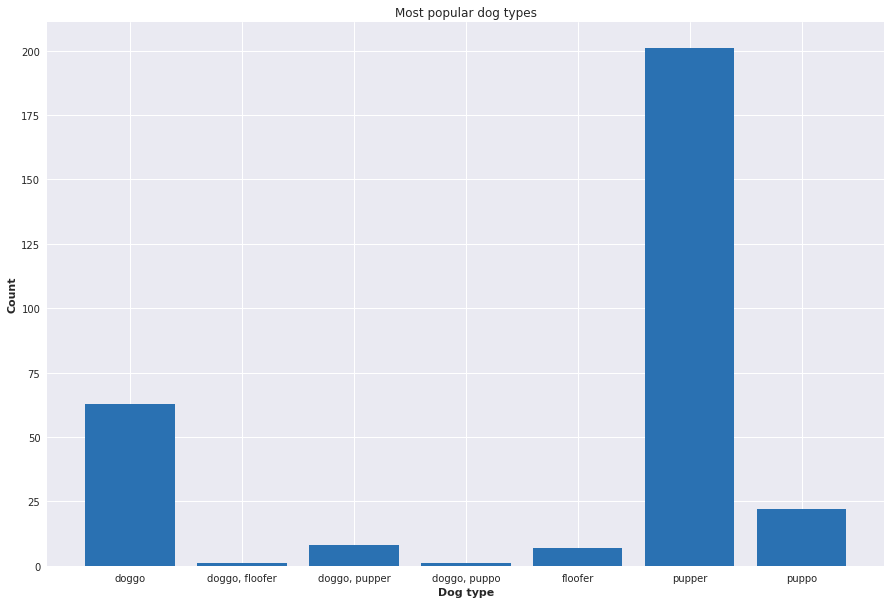

In [105]:
plt.subplots(figsize=(15, 10))
plt.bar([1, 2, 3, 4, 5, 6, 7], count_dogs, tick_label=['doggo', 'doggo, floofer', 'doggo, pupper', 'doggo, puppo', 
                                                       'floofer','pupper', 'puppo'])
plt.title('Most popular dog types')
plt.xlabel('Dog type', weight='bold')
plt.ylabel('Count', weight='bold')
plt.savefig('most_pop_types.png');

#### Retweets over time

In [106]:
retweets = archive.groupby(pd.Grouper(key='timestamp', freq='1w'))['retweet_count'].sum()\
.reset_index().sort_values('timestamp')[:-1]

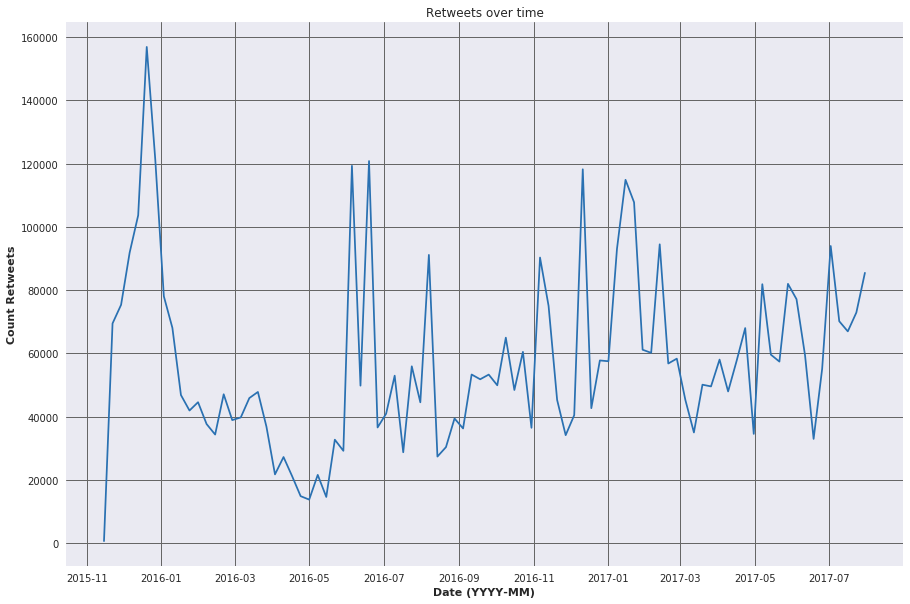

In [107]:
plt.subplots(figsize=(15, 10))
plt.plot(retweets.timestamp, retweets.retweet_count)
plt.grid(b=True, which='major', color='#666666', linestyle='-')
plt.title('Retweets over time')
plt.xlabel('Date (YYYY-MM)', weight='bold')
plt.ylabel('Count Retweets', weight='bold')
plt.savefig('retweets.png');

#### Favorites over time

In [108]:
favorites = archive.groupby(pd.Grouper(key='timestamp', freq='1w'))['favorite_count'].sum().reset_index().sort_values('timestamp')[:-1]

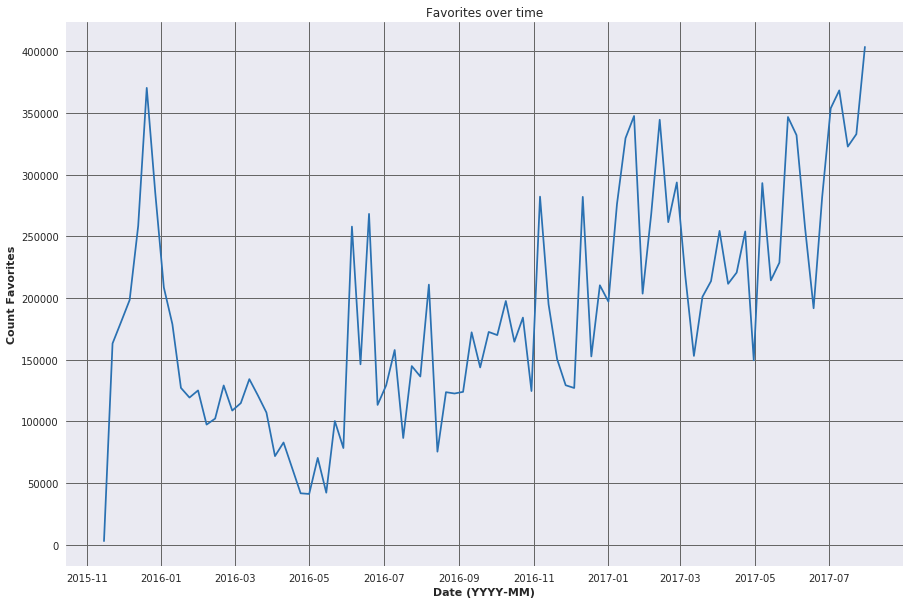

In [109]:
plt.subplots(figsize=(15, 10))
plt.plot(favorites.timestamp, favorites.favorite_count)
plt.grid(b=True, which='major', color='#666666', linestyle='-')
plt.title('Favorites over time')
plt.xlabel('Date (YYYY-MM)', weight='bold')
plt.ylabel('Count Favorites', weight='bold')
plt.savefig('favorites.png');

#### Retweets and Favorites in comparision

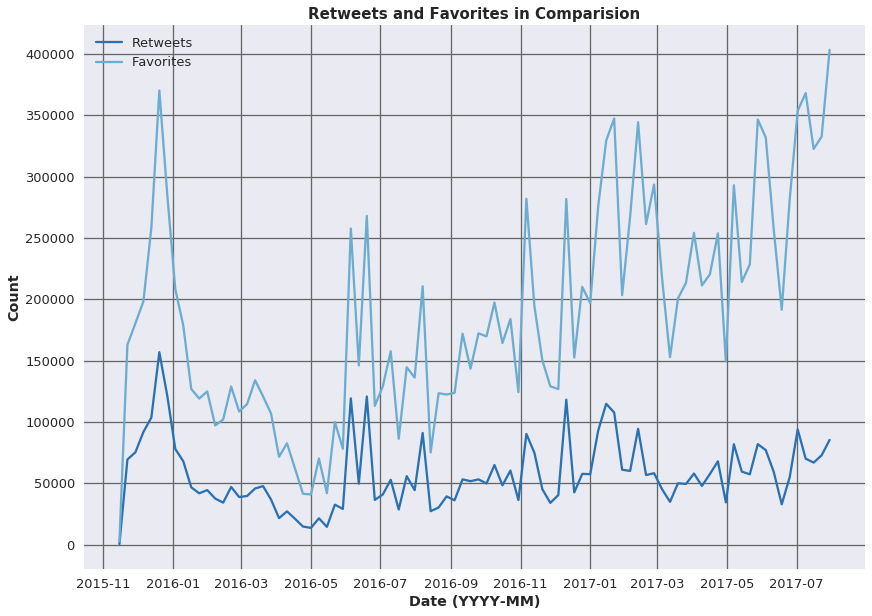

In [110]:
sns.set_context("talk")
plt.subplots(figsize=(14, 10))
plt.plot(retweets.timestamp, retweets.retweet_count, label="Retweets")
plt.plot(favorites.timestamp, favorites.favorite_count, label="Favorites")
plt.grid(b=True, which='major', color='#666666', linestyle='-')
plt.title('Retweets and Favorites in Comparision', fontsize=15, weight='bold')
plt.xlabel('Date (YYYY-MM)', weight='bold')
plt.ylabel('Count', weight='bold')
plt.legend()
plt.savefig('tweet_fav_comp.png');